In [ ]:
import pandas as pd
import gdown

file_id = "1dw7ExRdYbqLSm-DArJDq-Ebi-36Relwv"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "Dataset.csv", quiet=False)

df = pd.read_csv("Dataset.csv", encoding="ISO-8859-1")

columns_to_drop = ["Customer Email", "Customer Password", "Product Description", "Product Image"]
df.drop(columns=columns_to_drop, inplace=True)

df["order date (DateOrders)"] = pd.to_datetime(df["order date (DateOrders)"], errors='coerce')
df["shipping date (DateOrders)"] = pd.to_datetime(df["shipping date (DateOrders)"], errors='coerce')

df["actual_shipping_days"] = (df["shipping date (DateOrders)"] - df["order date (DateOrders)"]).dt.days

print(df[['order date (DateOrders)', 'shipping date (DateOrders)']].isna().sum())

print(df.isna().sum())

df.dropna(inplace=True)

df.head(15)

Downloading...
From: https://drive.google.com/uc?id=1dw7ExRdYbqLSm-DArJDq-Ebi-36Relwv
To: /content/Dataset.csv

  0%|          | 0.00/95.9M [00:00<?, ?B/s]
 19%|█▉        | 18.4M/95.9M [00:00<00:00, 183MB/s]
 42%|████▏     | 39.8M/95.9M [00:00<00:00, 200MB/s]
 63%|██████▎   | 60.3M/95.9M [00:00<00:00, 116MB/s]
 80%|███████▉  | 76.5M/95.9M [00:00<00:00, 128MB/s]
100%|██████████| 95.9M/95.9M [00:00<00:00, 113MB/s] 


order date (DateOrders)       0
shipping date (DateOrders)    0
dtype: int64
Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0
Ord

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,actual_shipping_days
55,PAYMENT,2,2,22.410000,74.680000,Shipping on time,0,13,Electronics,Caguas,...,PENDING_PAYMENT,99301.0,278,13,Under Armour Men's Compression EV SL Slide,44.990002,0,2016-06-13 15:12:00,Second Class,2
56,PAYMENT,5,2,25.240000,90.150002,Late delivery,1,12,Boxing & MMA,Caguas,...,PENDING_PAYMENT,90049.0,249,12,Under Armour Women's Micro G Skulpt Running S,54.970001,0,2016-08-29 21:45:00,Second Class,5
57,PAYMENT,6,2,30.570000,117.580002,Late delivery,1,17,Cleats,Caguas,...,PENDING_PAYMENT,94110.0,365,17,Perfect Fitness Perfect Rip Deck,59.990002,0,2016-04-19 10:12:00,Second Class,6
58,PAYMENT,4,2,46.070000,95.980003,Late delivery,1,17,Cleats,Caguas,...,PENDING_PAYMENT,66212.0,365,17,Perfect Fitness Perfect Rip Deck,59.990002,0,2016-05-26 14:10:00,Second Class,4
183,TRANSFER,5,4,28.850000,128.220001,Shipping canceled,0,13,Electronics,Freeport,...,SUSPECTED_FRAUD,77041.0,278,13,Under Armour Men's Compression EV SL Slide,44.990002,0,2016-05-13 17:42:00,Standard Class,5
184,TRANSFER,5,4,133.910004,278.970001,Shipping canceled,0,9,Cardio Equipment,Fort Washington,...,SUSPECTED_FRAUD,85234.0,191,9,Nike Men's Free 5.0+ Running Shoe,99.989998,0,2016-04-07 19:51:00,Standard Class,5
185,TRANSFER,6,4,79.160004,272.970001,Shipping canceled,0,9,Cardio Equipment,Bakersfield,...,SUSPECTED_FRAUD,95123.0,191,9,Nike Men's Free 5.0+ Running Shoe,99.989998,0,2016-08-20 02:51:00,Standard Class,6
186,TRANSFER,5,4,19.110001,272.970001,Shipping canceled,0,9,Cardio Equipment,Fort Washington,...,SUSPECTED_FRAUD,85234.0,191,9,Nike Men's Free 5.0+ Running Shoe,99.989998,0,2016-04-07 19:51:00,Standard Class,5
187,TRANSFER,2,4,10.770000,170.970001,Shipping canceled,0,17,Cleats,Corona,...,SUSPECTED_FRAUD,93727.0,365,17,Perfect Fitness Perfect Rip Deck,59.990002,0,2016-05-20 16:38:00,Standard Class,2
188,TRANSFER,3,4,-284.529999,167.369995,Shipping canceled,0,17,Cleats,Cincinnati,...,SUSPECTED_FRAUD,85345.0,365,17,Perfect Fitness Perfect Rip Deck,59.990002,0,2016-05-08 13:40:00,Standard Class,3


Missing values in actual_shipping_days: 0


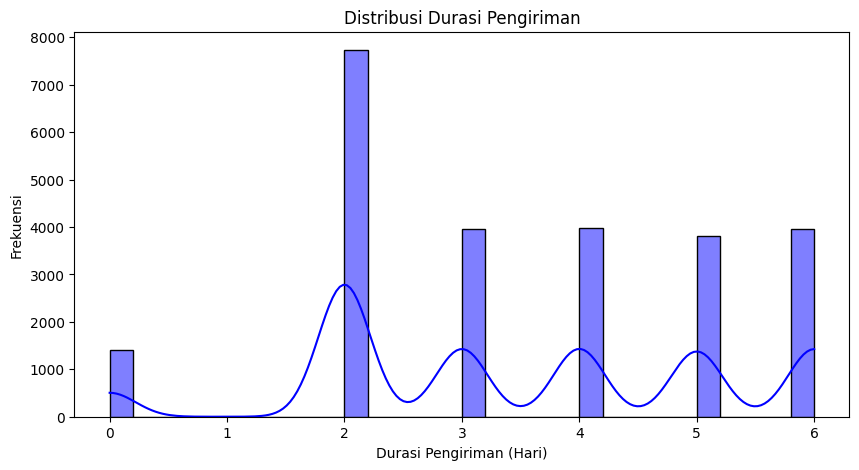

<ipython-input-13-0085e1b8b09b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Late_delivery_risk", data=df.dropna(), palette="coolwarm")


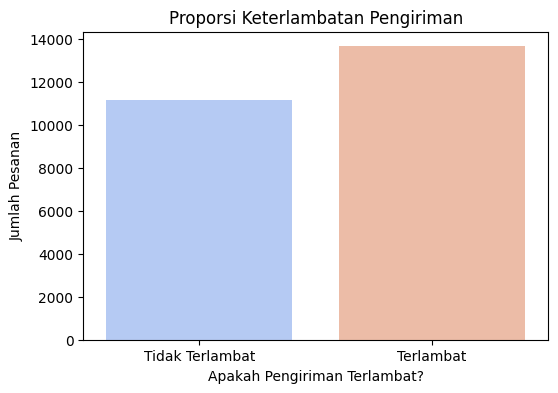

<ipython-input-13-0085e1b8b09b>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Shipping Mode", y="actual_shipping_days", data=df.dropna(), palette="Set2")


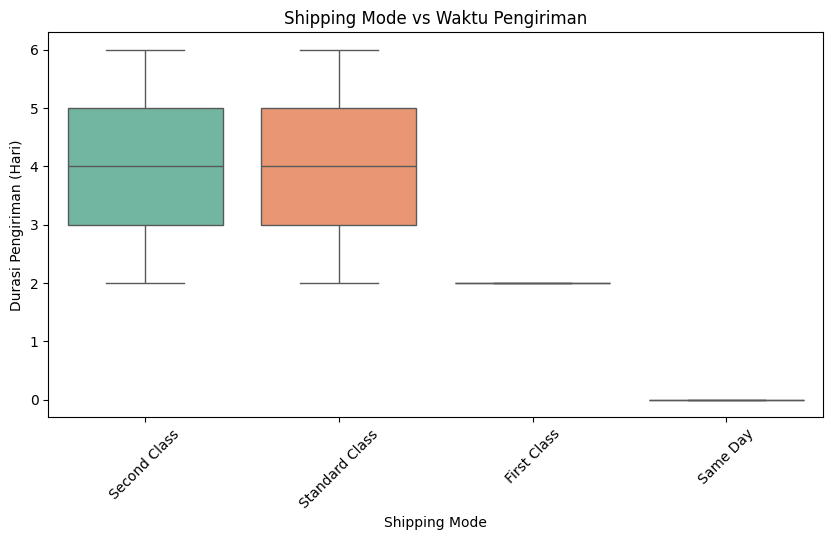

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Missing values in actual_shipping_days:", df["actual_shipping_days"].isna().sum())

plt.figure(figsize=(10, 5))
sns.histplot(df["actual_shipping_days"], bins=30, kde=True, color="blue")
plt.xlabel("Durasi Pengiriman (Hari)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Durasi Pengiriman")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x="Late_delivery_risk", data=df.dropna(), palette="coolwarm")
plt.xlabel("Apakah Pengiriman Terlambat?")
plt.ylabel("Jumlah Pesanan")
plt.xticks(ticks=[0, 1], labels=["Tidak Terlambat", "Terlambat"])
plt.title("Proporsi Keterlambatan Pengiriman")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="Shipping Mode", y="actual_shipping_days", data=df.dropna(), palette="Set2")
plt.xlabel("Shipping Mode")
plt.ylabel("Durasi Pengiriman (Hari)")
plt.title("Shipping Mode vs Waktu Pengiriman")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

selected_features = [
    "Days for shipment (scheduled)", "Shipping Mode", "Order Region", "Order State",
    "Sales per customer", "Order Item Quantity"
]
target = "actual_shipping_days"

categorical_features = ["Shipping Mode", "Order Region", "Order State"]
numerical_features = ["Days for shipment (scheduled)", "Sales per customer", "Order Item Quantity"]

X_train, X_test, y_train, y_test = train_test_split(df[selected_features], df[target], test_size=0.2, random_state=42)

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

X_train_final = np.hstack((X_train[numerical_features].values, X_train_encoded))
X_test_final = np.hstack((X_test[numerical_features].values, X_test_encoded))

print(f"Jumlah data training: {X_train_final.shape[0]}")
print(f"Jumlah data testing: {X_test_final.shape[0]}")

Jumlah data training: 19872
Jumlah data testing: 4968


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb

X_train_sample, _, y_train_sample, _ = train_test_split(X_train_final, y_train, test_size=0.3, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest (Optimized)": RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_sample, y_train_sample)
    y_pred = model.predict(X_test_final)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R2 Score": r2}

for model, metrics in results.items():
    print(f"\nModel: {model}")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']:.2f}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']:.2f}")
    print(f"R2 Score: {metrics['R2 Score']:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 362
[LightGBM] [Info] Number of data points in the train set: 13910, number of used features: 52
[LightGBM] [Info] Start training from score 3.459094

Model: Linear Regression
Mean Absolute Error (MAE): 0.99
Root Mean Squared Error (RMSE): 1.28
R2 Score: 0.4251

Model: Random Forest (Optimized)
Mean Absolute Error (MAE): 1.06
Root Mean Squared Error (RMSE): 1.41
R2 Score: 0.2997

Model: LightGBM
Mean Absolute Error (MAE): 1.00
Root Mean Squared Error (RMSE): 1.29
R2 Score: 0.4149


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

lgb_model = lgb.LGBMRegressor(random_state=42)
grid_search = RandomizedSearchCV(lgb_model, param_distributions=param_grid, cv=3, scoring='r2', n_iter=10, n_jobs=-1, random_state=42)
grid_search.fit(X_train_final, y_train)

print("Best Parameters:", grid_search.best_params_)

best_lgb = grid_search.best_estimator_

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 19872, number of used features: 55
[LightGBM] [Info] Start training from score 3.446407
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<ipython-input-31-972ea508de99>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="dark")  # Ganti dengan palet lebih tajam


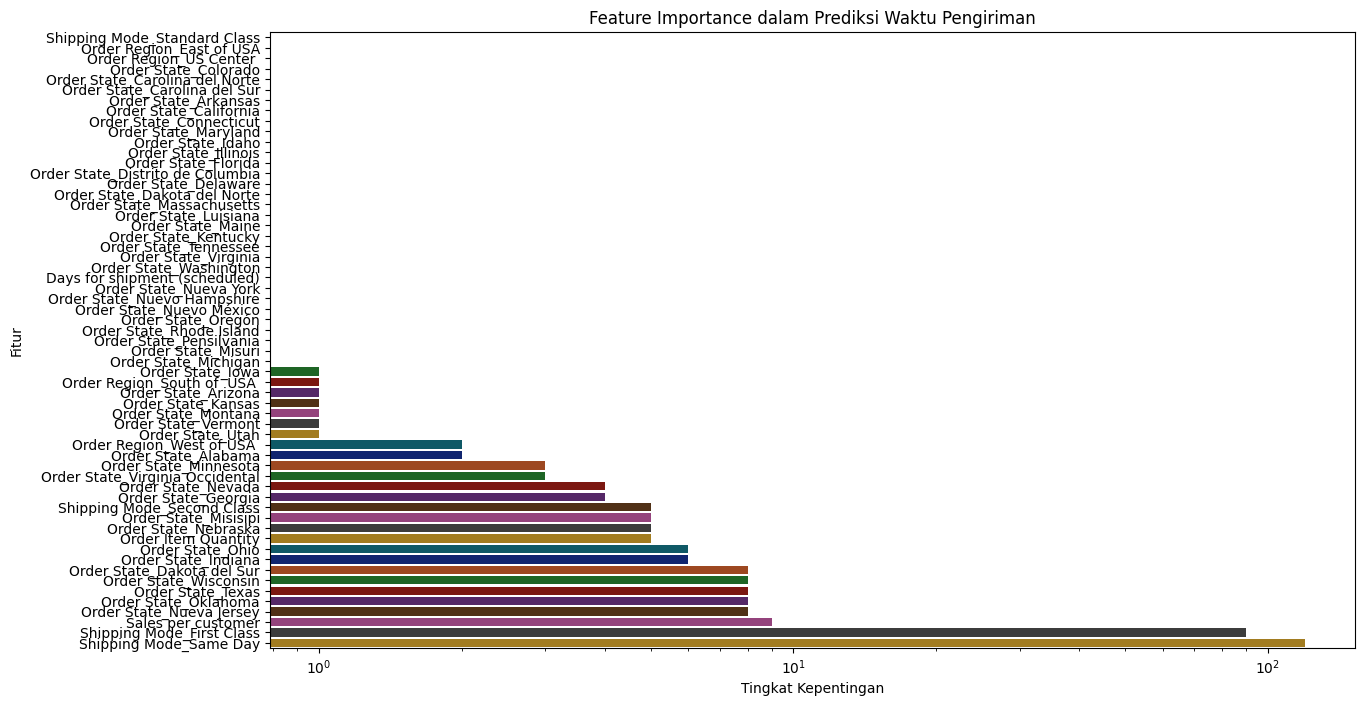

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=True)  # Urutkan agar lebih rapi

plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="dark")  # Ganti dengan palet lebih tajam

plt.xlabel("Tingkat Kepentingan")
plt.ylabel("Fitur")
plt.title("Feature Importance dalam Prediksi Waktu Pengiriman")

plt.yticks(fontsize=10)

plt.xscale("log")

plt.show()

In [ ]:
import numpy as np
import pandas as pd

new_data = pd.DataFrame({
    "Days for shipment (scheduled)": [5],
    "Shipping Mode": ["Standard Class"],
    "Order Region": ["US East"],
    "Order State": ["New York"],
    "Sales per customer": [500],
    "Order Item Quantity": [2]
})

new_data_encoded = encoder.transform(new_data[categorical_features])

new_data_final = np.hstack((new_data[numerical_features].values, new_data_encoded))

predicted_days = best_lgb.predict(new_data_final)

print("Prediksi Waktu Pengiriman:", round(predicted_days[0]), "hari")

Prediksi Waktu Pengiriman: 4 hari


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
